In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip3 install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.3 MB/s eta 0:00:00


In [227]:
import nltk
import csv

In [228]:
import os
import re
import PyPDF2
import spacy
import gensim.downloader as api


In [229]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [230]:
import numpy as np
import pandas as pd

In [231]:
from collections import Counter

In [232]:
from nltk.corpus import stopwords
stopw  = set(stopwords.words('english'))

In [233]:
import re
from ftfy import fix_text

In [234]:
df =pd.read_csv('/content/modified_jobs.csv')

In [235]:
df['test']=df['Job Description'].apply(lambda x: ' '.join([word for word in str(x).split() if len(word)>2 and word not in (stopw)]))
df['test']

0       Social Media Managers oversee organizations so...
1       Frontend Web Developers design implement user ...
2       Quality Control Managers establish enforce qua...
3       Wireless Network Engineers design, implement, ...
4       Conference Manager coordinates manages confere...
                              ...                        
6024    Social Media Analysts analyze social media dat...
6025    Supply Chain Managers manage end-to-end supply...
6026    Staff Nurse provides patient care, administers...
6027    Market Research Analyst gathers analyzes data ...
6028    Coordinate corporate events, conferences, meet...
Name: test, Length: 6029, dtype: object

In [236]:
df.head(5)

,Job Id,Work Type,Job Title,Experience,Qualifications,Salary Range,location,Country,Role,Job Description,test
0,1,Intern,Digital Marketing Specialist,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Social Media Manager,Social Media Managers oversee an organizations...,Social Media Managers oversee organizations so...
1,2,Intern,Web Developer,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Frontend Web Developer,Frontend Web Developers design and implement u...,Frontend Web Developers design implement user ...
2,3,Temporary,Operations Manager,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Quality Control Manager,Quality Control Managers establish and enforce...,Quality Control Managers establish enforce qua...
3,4,Full-Time,Network Engineer,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...","Wireless Network Engineers design, implement, ..."
4,5,Intern,Event Manager,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Conference Manager,A Conference Manager coordinates and manages c...,Conference Manager coordinates manages confere...


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
word_vectors = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [237]:
import re
import PyPDF2
from gensim.models import KeyedVectors


### **EXTRACTING SKILLS FROM RESUME**

In [238]:
def extract_skills(text):
    if isinstance(text, str) or isinstance(text, bytes):
        skills = []
        skills_section = re.search(r'SKILLS\s*(.*?)(?=\n\n|$)', text, re.DOTALL)
        if skills_section:
            skills_text = skills_section.group(1)
            skills = [skill.strip() for skill in skills_text.split('\n')]
        return skills
    else:
        return []

In [239]:
resume_file = input('specify the path of the resume (format(.txt, .docx and .pdf))==')
with open(resume_file, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    text = ''
    for page in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[page].extract_text()

specify the path of the resume (format(.txt, .docx and .pdf))==/content/resume1.pdf


In [240]:
print(text)

Jhansi Sreya
Jagarapu 
B.E. in Information Technology 
ugs19003_it.jhansi@cbit.ac.in 
6303006524 
Hyderabad, India 
EDUCATION 
BACHELOR OF ENGINEERING (B.E. - IT) 
Chaitanya Bharathi Institute of Technology,
Hyderabad 
08/2019 - Present
, 
 
8.95 CGPA(Till 5th sem) 
Information Technology 
Intermediate 
Kakatiya Public School, Visakhapatnam 
06/2017 - 07/2019
, 
 
87% 
Central Board of Secondary
Education(CBSE) 
Dr.K.K.R's Gowtham school, Visakhapatnam 
06/2016 - 04/2017
, 
 
10 CGPA 
PERSONAL PROJECTS 
CYBERCAFE MANAGEMENT 
Created software with C++ programming language, achieving a
70% reduction in storing and updating the details of the
customer and the systems. 
SWING 
Designed a travel application with ﬂutter to ease ﬂexibility and
versatility in ﬁnding places which reduced 60% of users'
perplexity. 
RESUME SCREENER 
Reduced user diﬃculty by 60% by designing and launching a
self-trained resume analyzing system to score resumes and
predict salaries. 
SKILLS 
C 
C++ 
Python 
Data Sc

In [241]:
skills1 = extract_skills(text)


In [242]:
print(skills1)

['C', 'C++', 'Python', 'Data Science', 'Machine Learning', 'HTML', 'CSS', 'Flutter: Basic', 'MySQL', 'OOPS', 'Operating Systems', 'ACHIEVEMENTS', 'Participated in Smart India Hackathon', '(2022)', '', 'Proposed "Tracking of food waste for productive usage "', 'theme with the', 'help of', 'full-stack', 'web development and Machine Learning', 'Role as L1 in Run for Cause conducted by Hyderabad', 'Youth Assembly', 'completed assigned target of collecting Rs.10,000 as fundraising for the', 'construction of local hospitals for villagers.', 'Secured 3rd place in International Mathematics', 'Olympiad at class Level', '(2016)', '', 'Qualiﬁed for state-level Ramanujan Mathematics', 'Olympiad', '(2016)', '', 'CERTIFICATES', 'Python programming(Coursera)', '(05/2020 - 06/2020)', '', 'Authorized by the University of Michigan and oﬀered through Coursera', 'Web Development', '(06/2021 - 06/2021)', '', 'Basic Web Development with HTML,CSS,JS bootcamp conducted by', 'ShapeAI', 'Python & Machine Learni

In [243]:
def get_related_terms(term, topn=5):
    try:
        related_terms = word_vectors.most_similar(positive=[term], topn=topn)
        return [term for term, _ in related_terms]
    except KeyError:
        return []

In [244]:
def extract_skills_from_projects(projects_text):

    nlp = spacy.load("en_core_web_sm")


    doc = nlp(' '.join(projects_text))


    extracted_skills = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN']]


    word_counts = Counter(extracted_skills)

    extracted_skills = [word for word, count in word_counts.most_common() if count > 1]

    return extracted_skills


In [245]:
def expand_skills_with_related_terms(skills):
    expanded_skills = []
    for skill in skills:
        expanded_skills.append(skill)
        related_terms = get_related_terms(skill)
        expanded_skills.extend(related_terms)
    return expanded_skills

In [246]:
project_text = skills1

In [247]:
extracted_skills = extract_skills_from_projects(project_text)

In [248]:
def extract_skills_byComparing(text):
    if isinstance(text, str) or isinstance(text, bytes):
        skills = []

        with open('combined_skills.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            skill_rows = [row[0].lower() for row in reader]


        section_titles = ['SKILLS', 'Technical Skills', 'personal projects', 'Expertise',
                          'Experience', 'Projects', 'Certifications', 'Achievements',
                          'Education', 'Courses']
        section_titles = [title.lower() for title in section_titles]

        pattern = '|'.join(section_titles)


        sections = re.finditer(r'({})\s*(.*?)(?=\n\n|$)'.format(pattern), text, re.IGNORECASE | re.DOTALL)
        for section in sections:
            section_text = section.group(2).lower()

            for row in skill_rows:
                if row in section_text:
                    skills.append(row)


        unique_skills = list(set(skills))
        return unique_skills
    else:
        return []

In [249]:
skills2 = extract_skills_byComparing(text)

In [250]:
skills2 = [skill.lower() for skill in skills2]
skills2 = list(set(skills2))

In [251]:
extracted_skills = [skill.lower() for skill in extracted_skills]

In [252]:
combined_skills = list(set(skills2 + extracted_skills))

In [253]:
print("Combined skills:")
print(combined_skills)

Combined skills:
['bootcamp', 'development', 'data science', 'self', 'css', 'data ', 'design', 'shapeai', 'mathematics', 'education', 'level', 'operating systems', 'programming', 'reduce', 'web', 'analyz', 'sql', 'math', 'machine', 'versatility', 'data', 'software', 'leadership', 'python', 'leadership skills', 'r', 'smart', 'olympiad', 'sage', 'develop', 'j', 'machine learning', 'personal', 'c++', 'skills', 'html', 'quick learner', 'basic', '06/2021', 'c', 'mysql', 'skill', 'learning']


In [254]:
skills = []
for skill in combined_skills:
    skills.append(skill)
    skills.extend(get_related_terms(skill))

In [255]:
print(skills)

['bootcamp', 'auditions', 'trouper', 'audition', 'ozzfest', 're-fit', 'development', 'projects', 'project', 'developing', 'develop', 'economic', 'data science', 'self', 'kind', 'own', 'conscious', 'rather', 'determination', 'css', 'javascript', 'html', 'ironclad', 'xhtml', 'html5', 'data ', 'design', 'designs', 'designed', 'architecture', 'architectural', 'designing', 'shapeai', 'mathematics', 'physics', 'mathematical', 'math', 'biology', 'sociology', 'education', 'educational', 'schools', 'teaching', 'health', 'curriculum', 'level', 'levels', 'above', 'highest', 'below', 'higher', 'operating systems', 'programming', 'broadcasts', 'broadcast', 'programs', 'channel', 'channels', 'reduce', 'reducing', 'increase', 'eliminate', 'reduction', 'reduced', 'web', 'internet', 'online', 'website', 'websites', 'users', 'analyz', 'sql', 'postgresql', 'mysql', 'xml', 'server', 'c++', 'math', 'mathematics', 'graders', 'maths', 'literacy', 'proficiency', 'machine', 'machines', 'automatic', 'gun', 'gun

### **COMPARSION OF RESUME SKILLS WITH THE JOB DESCRIPTION SKILLS**

In [256]:
from collections import Counter

In [257]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [258]:
def extract_skills_from_csv(csv_file):
    skills_set = set()
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            skills_set.add(row[0].strip().lower())
    return skills_set

In [259]:
def extract_skills_from_resume(resume_text, skills_set):
    resume_words = word_tokenize(resume_text.lower())
    stop_words = set(stopwords.words('english'))

    extracted_skills = []

    for word in resume_words:
        if word not in stop_words and word in skills_set:
            extracted_skills.append(word)

    return extracted_skills

In [260]:
skills_file = "/content/combined_skills.csv"
skills_set = extract_skills_from_csv(skills_file)


In [261]:
jobs_df = pd.read_csv("/content/modified_jobs.csv")

In [262]:
job_skills = []
total_skills_count = []

In [263]:
for idx, row in jobs_df.iterrows():
    job_description = row['Job Description']
    skill = extract_skills_from_resume(job_description, skills_set)
    unique_skills = set(skill)
    total_skills = len(unique_skills)
    job_skills.append(", ".join(unique_skills))
    total_skills_count.append(total_skills)

In [264]:
jobs_df['Job Skills'] = job_skills
jobs_df['Total Skills'] = total_skills_count

In [265]:
print(jobs_df['Job Skills'])
print(jobs_df['Total Skills'])

0        facebook, instagram, twitter, analytics, develop
1              html, web, javascript, design, react, code
2                             develop, maintain, analysis
3       maintain, design, architecture, troubleshootin...
4                                     marketing, planning
                              ...                        
6024    data, facebook, reporting, google, data-driven...
6025                               data, reduce, analysis
6026                                              develop
6027    data, software, communication, skills, spss, v...
6028       communication, creativity, marketing, planning
Name: Job Skills, Length: 6029, dtype: object
0       5
1       6
2       3
3       6
4       2
       ..
6024    7
6025    3
6026    1
6027    9
6028    4
Name: Total Skills, Length: 6029, dtype: int64


In [266]:
resume_skills_set = set(skills)


In [267]:
print(resume_skills_set)

{'bootcamp', 'above', 'html5', 'css', 'teaching', 'olympiads', 'sen.', 'design', 'compilers', 'd', 'developed', 'teach', 'graders', 'tarragon', 'agastya', 'programming', 'rather', 'abilities', 'math', 'sql', 'aleck', 'versatility', 'biology', 'trouper', 'fortran', 'individual', 'economic', 'tenacity', 'promote', 'website', 'higher', 'developing', 'computers', 'smart', 'php', 'sqlite', 'highest', 'reduced', 'c++', 'skills', 'html', 'websites', 'javascript', 'c', 'informatics', 'learn', 'architecture', 'educational', 'templates', 'monty', 'kind', 'projects', 'reps.', 'party', 'analysis', 'automated', 'political', 'designs', 'data science', 'designed', 'literacy', 'determination', 'shapeai', 'mathematics', 'proficiency', 'education', 'postgresql', 'sens.', 'oregano', 'compiler', 'ironclad', 'curriculum', 'savvy', 'operating systems', 'athleticism', 'reduce', 'web', 'analyz', 'cleese', 'reduction', 'your', 'ability', 'sociology', 'online', 'leader', 're-fit', 'perl', 'leadership skills', '

In [268]:
resume_skills_set = {skill.lower().strip() for skill in resume_skills_set}

In [269]:
job_matched_skills_counter = {}
job_matched_skills = {}
matched_skills={}
matched_count = []

In [270]:
for idx, row in jobs_df.iterrows():

    job_skills_list = [skill.lower().strip() for skill in row['Job Skills'].split(", ")]

    job_skills_unique = set(job_skills_list)


    matched_skills = [skill for skill in job_skills_unique if skill.lower() in resume_skills_set]
    matched_count = len(matched_skills)


    job_matched_skills_counter[idx] = matched_count
    job_matched_skills[idx] = matched_skills

In [271]:
job_ids = []
job_titles = []
work_types = []
total_skills_counts = []
matched_skills_counts = []
percentage_matches = []
job_roles = []

top_matched_jobs = sorted(job_matched_skills_counter.items(), key=lambda x: x[1], reverse=True)[:200]

for job_id, matched_count in top_matched_jobs:
    if job_id in jobs_df['Job Id'].values:

        job_details = jobs_df[jobs_df['Job Id'] == job_id + 1].iloc[0]
        job_title = job_details['Job Title']
        work_type = job_details['Work Type']
        total_skills_count = len(job_details['Job Skills'].split(","))
        job_role = job_details['Role']


        percentage_match = (matched_count / total_skills_count) * 100


        job_ids.append(job_id + 1)
        job_titles.append(job_title)
        work_types.append(work_type)
        job_roles.append(job_role)

        total_skills_counts.append(total_skills_count)
        matched_skills_counts.append(matched_count)
        percentage_matches.append(percentage_match)



job_details_df = pd.DataFrame({
    'Job ID': job_ids,
    'Job Title': job_titles,
    'Work Type': work_types,
    'Job Role': job_roles,
    'Total Skills Count': total_skills_counts,
    'Matched Skills Count': matched_skills_counts,
    'Percentage Match': percentage_matches
})


job_details_df_sorted = job_details_df.sort_values(by='Percentage Match', ascending=False)


print(job_details_df_sorted)



     Job ID     Job Title  Work Type               Job Role  \
199    2301  Web Designer  Full-Time  Frontend Web Designer   
192    1912  Web Designer     Intern  Frontend Web Designer   
166     653  Web Designer  Full-Time  Frontend Web Designer   
160     278  Web Designer  Part-Time  Frontend Web Designer   
177    1244  Web Designer  Full-Time  Frontend Web Designer   
..      ...           ...        ...                    ...   
138    4865  Data Analyst   Contract         Data Scientist   
89     1413  Data Analyst   Contract         Data Scientist   
86     1233  Data Analyst  Temporary         Data Scientist   
85     1163  Data Analyst     Intern         Data Scientist   
90     1470  Data Analyst     Intern         Data Scientist   

     Total Skills Count  Matched Skills Count  Percentage Match  
199                   8                     6         75.000000  
192                   8                     6         75.000000  
166                   8                     6

### **PIE CHART BETWEEN JOB TITLE AND PERCENTAGE MATCH**

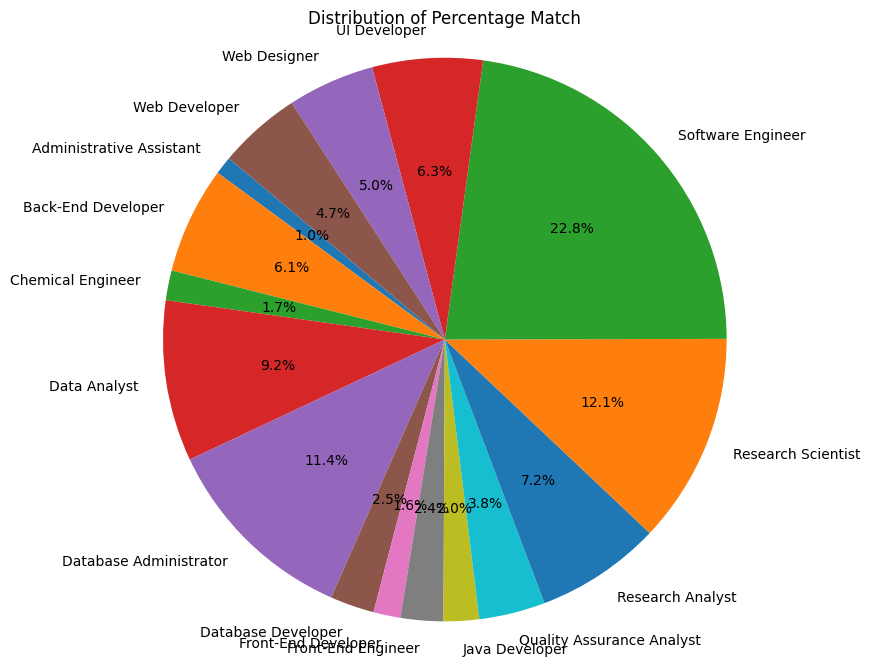

In [272]:
job_titles = job_details_df_sorted['Job Title']
total_skills_count = job_details_df_sorted['Percentage Match']

import pandas as pd
import matplotlib.pyplot as plt

grouped_skills_df = job_details_df_sorted.groupby('Job Title')['Percentage Match'].sum().reset_index()

job_titles = grouped_skills_df['Job Title']
total_skills_count = grouped_skills_df['Percentage Match']

plt.figure(figsize=(8, 8))
plt.pie(total_skills_count, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Percentage Match')
plt.show()


### **BAR CHART BETWEEN JOB TITLE AND TOTAL SKILLS COUNT**

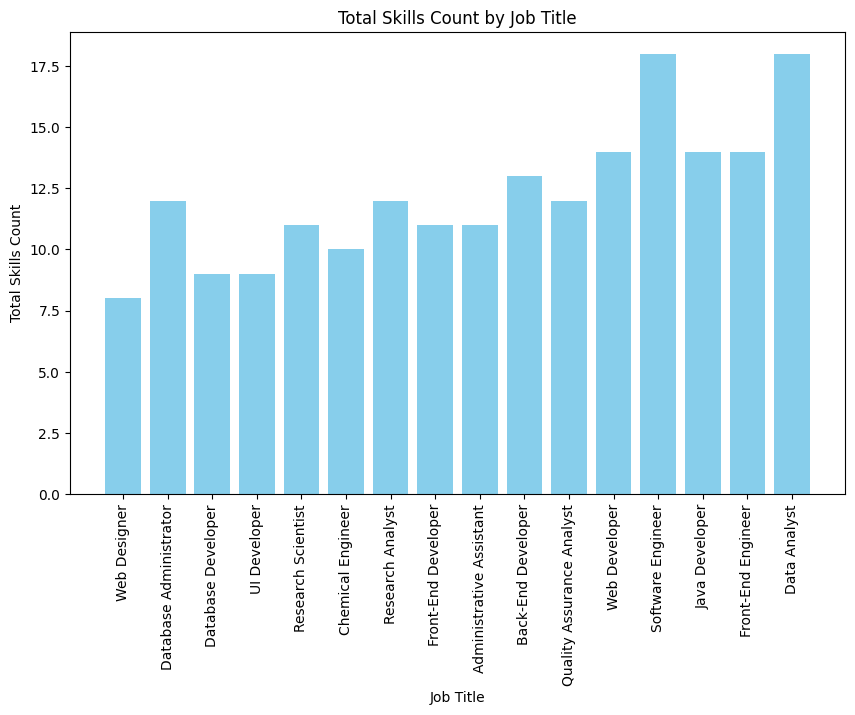

In [274]:
import matplotlib.pyplot as plt

job_titles = job_details_df_sorted['Job Title']
total_skills_count = job_details_df_sorted['Total Skills Count']

plt.figure(figsize=(10, 6))
plt.bar(job_titles, total_skills_count, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Total Skills Count')
plt.title('Total Skills Count by Job Title')
plt.xticks(rotation=90)
plt.show()


### **BAR CHART BETWEEN JOB TITLE AND MATCHED SKILLS COUNT**

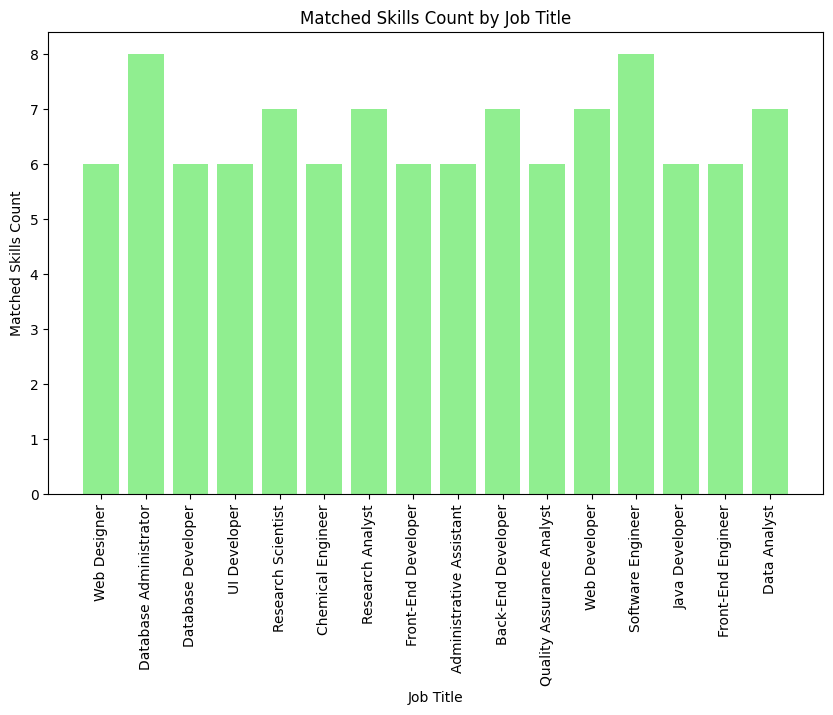

In [275]:
import matplotlib.pyplot as plt

job_titles = job_details_df_sorted['Job Title']
matched_skills_count = job_details_df_sorted['Matched Skills Count']

plt.figure(figsize=(10, 6))
plt.bar(job_titles, matched_skills_count, color='lightgreen')
plt.xlabel('Job Title')
plt.ylabel('Matched Skills Count')
plt.title('Matched Skills Count by Job Title')
plt.xticks(rotation=90)
plt.show()

### **BAR CHART BETWEEN JOB TITLE AND PERCENTAGE MATCH**

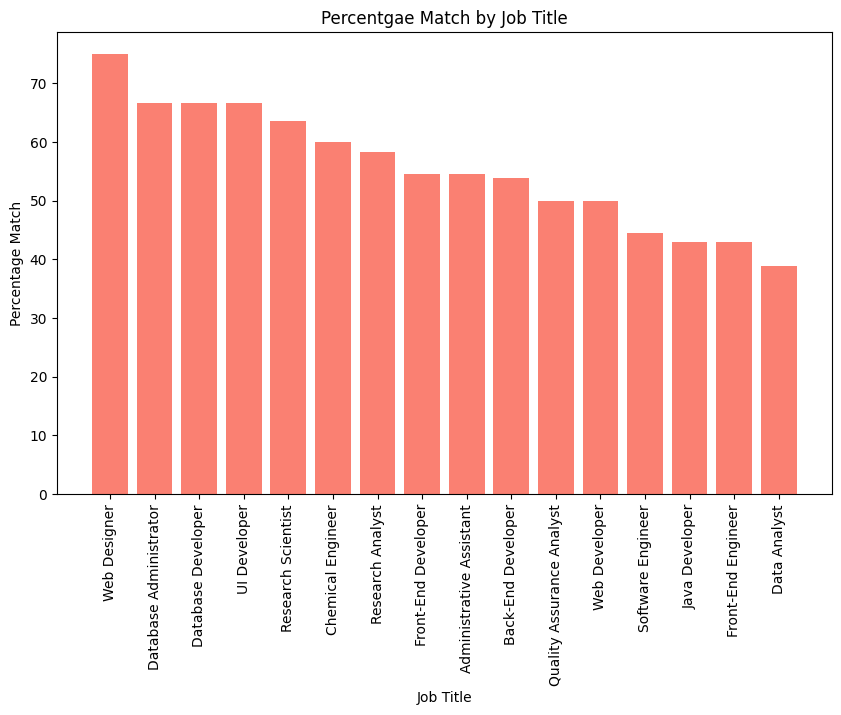

In [276]:
import matplotlib.pyplot as plt

job_titles = job_details_df_sorted['Job Title']
percentage_match = job_details_df_sorted['Percentage Match']

plt.figure(figsize=(10, 6))
plt.bar(job_titles, percentage_match, color='salmon')
plt.xlabel('Job Title')
plt.ylabel('Percentage Match')
plt.title('Percentgae Match by Job Title')
plt.xticks(rotation=90)
plt.show()

### **MATCHING CONFIDENCE**

In [277]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [278]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [279]:
def ngrams(string, n=3):
    string = fix_text(string)
    string = string.encode("ascii", errors="ignore").decode()
    string = string.lower()
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title()
    string = re.sub(' +',' ',string).strip()
    string = ' '+ string +' '
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [280]:
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams, lowercase=False)
tfidf = vectorizer.fit_transform(skills)

In [281]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)
test = (df['test'].values.astype('U'))

In [282]:
def getNearestN(query):
  queryTFIDF_ = vectorizer.transform(query)
  distances, indices = nbrs.kneighbors(queryTFIDF_)
  return distances, indices


In [283]:
distances, indices = getNearestN(test)
test = list(test)
matches = []


In [284]:
for i,j in enumerate(indices):
    dist=round(distances[i][0],2)

    temp = [dist]
    matches.append(temp)

matches = pd.DataFrame(matches, columns=['Confidence'])

In [285]:
print(matches)

      Confidence
0           1.16
1           0.98
2           1.18
3           1.18
4           1.21
...          ...
6024        1.06
6025        1.18
6026        1.25
6027        0.81
6028        1.22

[6029 rows x 1 columns]


In [286]:
stemmer = PorterStemmer()
df['preprocessed'] = df['test'].fillna('').apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(str(x).lower()) if word not in stopw and len(word) > 2]))

In [288]:
resume_skills2 = ' '.join(skills)
resume_skills2 = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(resume_skills2.lower()) if word not in stopw and len(word) > 2])

In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
tfidf_job_descriptions = vectorizer.fit_transform(df['preprocessed'])
tfidf_resume_skills = vectorizer.transform([resume_skills2])

In [290]:
cosine_similarities = cosine_similarity(tfidf_resume_skills, tfidf_job_descriptions).flatten()


In [291]:
percentage_matches = cosine_similarities * 100

In [292]:
job_matches = pd.DataFrame({
    'Job Id': df['Job Id'].values,
    'Work Type': df['Work Type'].values,
    'Job Title': df['Job Title'].values,
    'Match Confidence': percentage_matches
})

In [293]:
top_matches_with_details = job_matches.copy()

In [294]:
print(top_matches_with_details.columns)

Index(['Job Id', 'Work Type', 'Job Title', 'Match Confidence'], dtype='object')


In [295]:

print(top_matches_with_details[['Job Title', 'Work Type', 'Match Confidence']].reset_index(drop=True))


                         Job Title  Work Type  Match Confidence
0     Digital Marketing Specialist     Intern          1.018432
1                    Web Developer     Intern         10.990399
2               Operations Manager  Temporary          1.816371
3                 Network Engineer  Full-Time          1.735480
4                    Event Manager     Intern          0.358965
...                            ...        ...               ...
6024          Social Media Manager  Part-Time          1.807628
6025            Operations Manager  Temporary          1.876216
6026              Registered Nurse  Temporary          0.497206
6027              Research Analyst  Part-Time          4.149867
6028             Event Coordinator  Temporary          0.000000

[6029 rows x 3 columns]


In [296]:
print("\nTop 20 Job Matches:")
top_20_matches = job_matches[['Job Id', 'Match Confidence']].nlargest(20, 'Match Confidence').reset_index(drop=True)

top_20_matches_with_details = pd.merge(top_20_matches, jobs_df, on='Job Id', how='left')

print(top_20_matches_with_details[['Job Title', 'Work Type', 'Match Confidence']].reset_index(drop=True))



Top 20 Job Matches:
           Job Title  Work Type  Match Confidence
0     Data Scientist  Temporary         28.531858
1     Data Scientist   Contract         28.531858
2     Data Scientist  Temporary         28.531858
3     Data Scientist  Part-Time         28.531858
4     Data Scientist   Contract         28.531858
5     Data Scientist  Full-Time         28.531858
6     Data Scientist  Temporary         28.531858
7     Data Scientist   Contract         28.531858
8     Data Scientist  Full-Time         28.531858
9     Data Scientist  Full-Time         28.531858
10    Data Scientist     Intern         28.531858
11    Data Scientist     Intern         28.531858
12    Data Scientist   Contract         28.531858
13    Data Scientist  Full-Time         28.531858
14  Technical Writer  Full-Time         24.913137
15  Technical Writer     Intern         24.913137
16  Technical Writer     Intern         24.913137
17  Technical Writer     Intern         24.913137
18  Technical Writer   Contra

In [297]:
jobs_df_updated = jobs_df.copy()

In [298]:
job_skills_counts = []
matched_skills_counts = []

In [299]:
for idx, row in jobs_df.iterrows():
    job_skills = row['Job Skills'].split(", ")
    matched_skills = [skill for skill in job_skills if skill.lower() in resume_skills2.split()]

    job_skills_counts.append(len(job_skills))
    matched_skills_counts.append(len(matched_skills))


In [300]:
jobs_df_updated['Total Skills Count'] = job_skills_counts
jobs_df_updated['Matched Skills Count'] = matched_skills_counts

In [301]:
print(jobs_df_updated.columns)


Index(['Job Id', 'Work Type', 'Job Title', 'Experience', 'Qualifications',
       'Salary Range', 'location', 'Country', 'Role', 'Job Description',
       'Job Skills', 'Total Skills', 'Total Skills Count',
       'Matched Skills Count'],
      dtype='object')


In [302]:

for job_id, match_confidence in zip(top_matches_with_details['Job Id'], top_matches_with_details['Match Confidence']):
    jobs_df_updated.loc[jobs_df_updated['Job Id'] == job_id, 'Match Confidence'] = match_confidence


print(jobs_df_updated[['Job Title', 'Work Type', 'Match Confidence']].reset_index(drop=True))


                         Job Title  Work Type  Match Confidence
0     Digital Marketing Specialist     Intern          1.018432
1                    Web Developer     Intern         10.990399
2               Operations Manager  Temporary          1.816371
3                 Network Engineer  Full-Time          1.735480
4                    Event Manager     Intern          0.358965
...                            ...        ...               ...
6024          Social Media Manager  Part-Time          1.807628
6025            Operations Manager  Temporary          1.876216
6026              Registered Nurse  Temporary          0.497206
6027              Research Analyst  Part-Time          4.149867
6028             Event Coordinator  Temporary          0.000000

[6029 rows x 3 columns]


In [303]:

top_matched_skills = jobs_df_updated.sort_values(by=[ 'Match Confidence'], ascending=False).head(300)


print("\nTop 20 Highly Matched Skills Count with Total Skills Count and Match Confidence:")
print(top_matched_skills[['Job Title', 'Work Type', 'Total Skills Count', 'Matched Skills Count', 'Match Confidence']].reset_index(drop=True))



Top 20 Highly Matched Skills Count with Total Skills Count and Match Confidence:
               Job Title  Work Type  Total Skills Count  Matched Skills Count  \
0         Data Scientist     Intern                   6                     3   
1         Data Scientist  Temporary                   6                     3   
2         Data Scientist  Temporary                   6                     3   
3         Data Scientist     Intern                   6                     3   
4         Data Scientist  Full-Time                   6                     3   
..                   ...        ...                 ...                   ...   
295        Web Developer  Full-Time                  14                     5   
296        Web Developer     Intern                  14                     5   
297        Web Developer  Temporary                  14                     5   
298  Landscape Architect  Part-Time                   3                     1   
299  Landscape Architect  F

### **PIE CHART BETWEEN JOB TITLE AND MATCH CONFIDENCE**

In [304]:
job_titles = top_matched_skills['Job Title']
total_skills_count = top_matched_skills['Match Confidence']

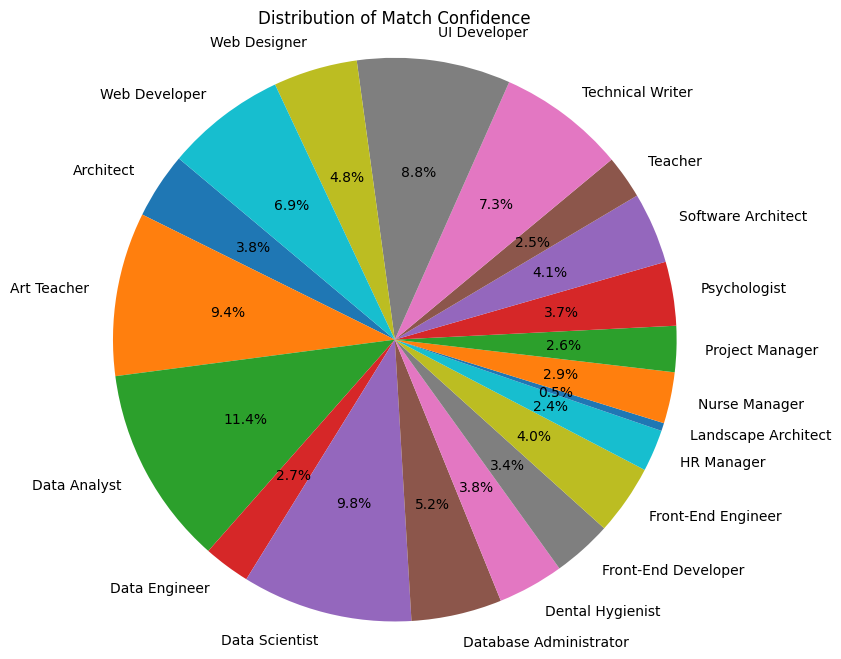

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_skills_df = top_matched_skills.groupby('Job Title')['Match Confidence'].sum().reset_index()

job_titles = grouped_skills_df['Job Title']
total_skills_count = grouped_skills_df['Match Confidence']

plt.figure(figsize=(8, 8))
plt.pie(total_skills_count, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Match Confidence')
plt.show()



### **BAR CHART BETWEEN JOB TITLE AND TOTAL SKILLS COUNT**

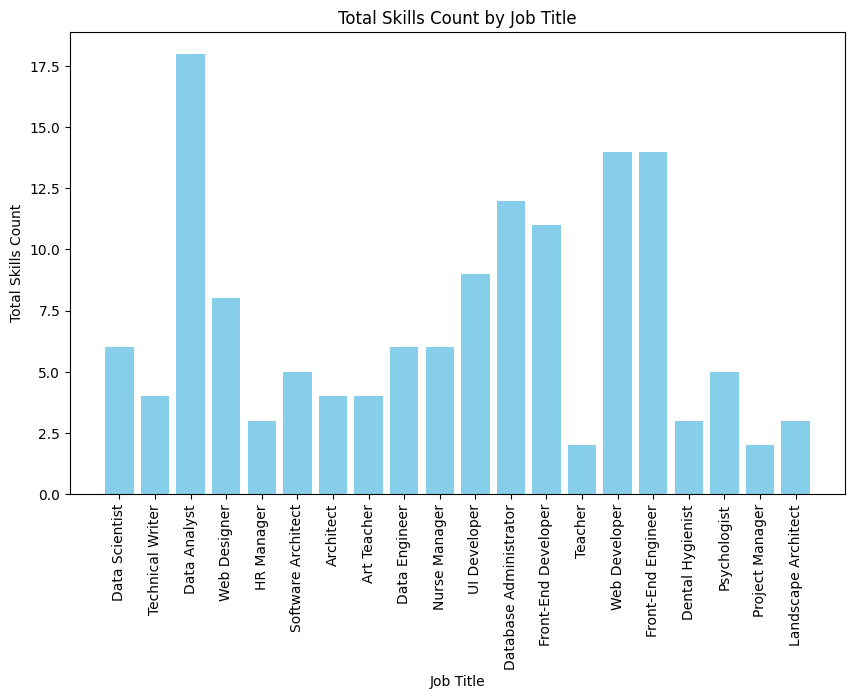

In [306]:
import matplotlib.pyplot as plt

job_titles = top_matched_skills['Job Title']
total_skills_count = top_matched_skills['Total Skills Count']
matched_skills_count = top_matched_skills['Matched Skills Count']
percentage_match = top_matched_skills['Match Confidence']


plt.figure(figsize=(10, 6))
plt.bar(job_titles, total_skills_count, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Total Skills Count')
plt.title('Total Skills Count by Job Title')
plt.xticks(rotation=90)
plt.show()


### **BAR CHART BETWEEN JOB TITLE AND MATCHED SKILLS COUNT**

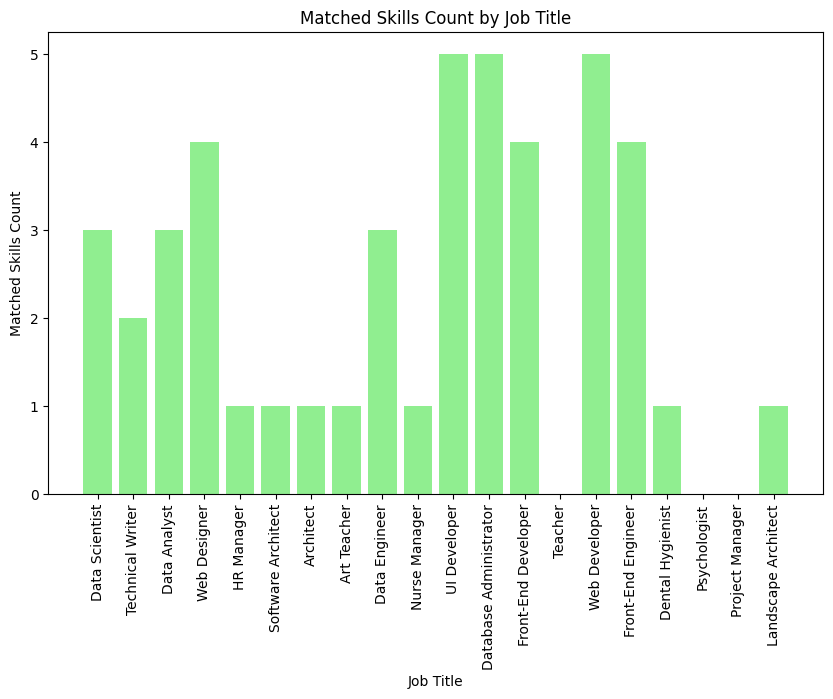

In [308]:
plt.figure(figsize=(10, 6))
plt.bar(job_titles, matched_skills_count, color='lightgreen')
plt.xlabel('Job Title')
plt.ylabel('Matched Skills Count')
plt.title('Matched Skills Count by Job Title')
plt.xticks(rotation=90)
plt.show()

### **BAR CHART BETWEEN JOB TITLE AND MATCH CONFIDENCE**

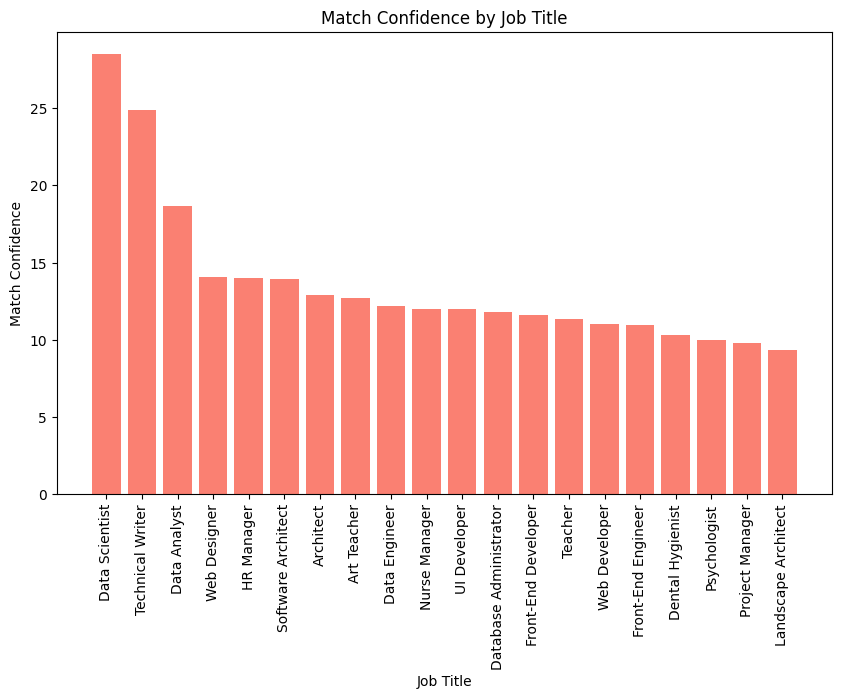

In [309]:
plt.figure(figsize=(10, 6))
plt.bar(job_titles, percentage_match, color='salmon')
plt.xlabel('Job Title')
plt.ylabel('Match Confidence')
plt.title('Match Confidence by Job Title')
plt.xticks(rotation=90)
plt.show()

### **QUANTIFIABLE ACHIEVEMENTS TO MATCH RESUME WITH JOB DESCRIPTION USING KNN ALOGORITHM**

In [310]:
import os
import pandas as pd
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [311]:
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

In [312]:
jobs_df = pd.read_csv('/content/modified_jobs.csv')

In [313]:
resume_folder = '/content/resumesfolder'
resume_files = [os.path.join(resume_folder, file) for file in os.listdir(resume_folder) if file.endswith('.pdf')]
resumes_text = [extract_text_from_pdf(file) for file in resume_files]

In [314]:
features = df[['Experience', 'Job Title', 'Work Type', 'Qualifications']]
labels = df['Job Title']


In [315]:
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(features.apply(lambda x: ' '.join(x), axis=1))
X_resumes = vectorizer.transform(resumes_text)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X_features, labels, test_size=0.2, random_state=42)

In [317]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [319]:
predicted_job_titles = knn_classifier.predict(X_resumes)

In [320]:
resume_list = []
job_title_list = []
job_id_list = []
experience_list = []
work_type_list = []
qualifications_list = []

In [321]:
for resume, predicted_job_title in zip(resume_files, predicted_job_titles):
    job_index = jobs_df[jobs_df['Job Title'] == predicted_job_title].index[0]
    job_id = jobs_df.at[job_index, 'Job Id']
    experience = jobs_df.at[job_index, 'Experience']
    job_title = jobs_df.at[job_index, 'Job Title']
    work_type = jobs_df.at[job_index, 'Work Type']
    qualifications = jobs_df.at[job_index, 'Qualifications']

    resume_list.append(resume)
    job_title_list.append(predicted_job_title)
    job_id_list.append(job_id)
    experience_list.append(experience)
    work_type_list.append(work_type)
    qualifications_list.append(qualifications)


In [322]:
matched_results_df = pd.DataFrame({
    'Resume': resume_list,
    'Job Title': job_title_list,
    'Job ID': job_id_list,
    'Experience': experience_list,
    'Work Type': work_type_list,
    'Qualifications': qualifications_list
})

In [323]:
print(matched_results_df)

                                 Resume                     Job Title  Job ID  \
0   /content/resumesfolder/resume15.pdf                    IT Manager     180   
1   /content/resumesfolder/resume14.pdf                Content Writer     115   
2    /content/resumesfolder/resume8.pdf                 Web Developer       2   
3    /content/resumesfolder/resume7.pdf               Project Manager      64   
4    /content/resumesfolder/resume3.pdf               Project Manager      64   
5   /content/resumesfolder/resume23.pdf            Software Developer      63   
6    /content/resumesfolder/resume5.pdf                 Data Engineer      70   
7    /content/resumesfolder/resume1.pdf  Business Development Manager     118   
8   /content/resumesfolder/resume10.pdf  Business Development Manager     118   
9   /content/resumesfolder/resume26.pdf                Java Developer     119   
10  /content/resumesfolder/resume27.pdf           Electrical Engineer      86   
11  /content/resumesfolder/r

In [324]:
y_pred = knn_classifier.predict(X_test)

In [325]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")





Accuracy: 99.34%
Precision: 0.9935420330157172
Recall: 0.9933665008291874
F1-score: 0.9926031219563558


In [327]:
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

                   Account Director       1.00      1.00      1.00         7
                  Account Executive       1.00      1.00      1.00         6
                    Account Manager       1.00      1.00      1.00        10
                         Accountant       1.00      1.00      1.00         8
           Administrative Assistant       1.00      1.00      1.00        18
                 Aerospace Engineer       1.00      1.00      1.00         8
                          Architect       1.00      0.92      0.96        13
             Architectural Designer       1.00      1.00      1.00         2
                       Art Director       1.00      1.00      1.00         4
                        Art Teacher       0.92      1.00      0.96        12
                 Back-End Developer       1.00      1.00      1.00         1
                   Brand Ambassador       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **QUANTIFIABLE ACHIEVEMENTS TO MATCH RESUME WITH JOB DESCRIPTION USING SVM ALOGORITHM**

In [328]:
import os
import pandas as pd
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [329]:
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text


In [330]:
jobs_df = pd.read_csv('/content/modified_jobs.csv')

In [331]:
resume_folder = '/content/resumesfolder'
resume_files = [os.path.join(resume_folder, file) for file in os.listdir(resume_folder) if file.endswith('.pdf')]
resumes_text = [extract_text_from_pdf(file) for file in resume_files]

In [332]:
features = jobs_df[['Experience', 'Job Title', 'Work Type', 'Qualifications']]
labels = jobs_df['Job Title']

In [333]:
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(features.apply(lambda x: ' '.join(x), axis=1))
X_resumes = vectorizer.transform(resumes_text)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_features, labels, test_size=0.2, random_state=42)


In [335]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [336]:
predicted_job_titles_svm = svm_classifier.predict(X_resumes)

In [337]:
resume_list_svm = []
job_title_list_svm = []
job_id_list_svm = []
experience_list_svm = []
work_type_list_svm = []
qualifications_list_svm = []

In [338]:
for resume, predicted_job_title in zip(resume_files, predicted_job_titles_svm):
    if predicted_job_title is None:

        resume_list_svm.append(resume)
        job_title_list_svm.append(None)
        job_id_list_svm.append(None)
        experience_list_svm.append(None)
        work_type_list_svm.append(None)
        qualifications_list_svm.append(None)
    else:
        job_index = jobs_df[jobs_df['Job Title'] == predicted_job_title].index[0]
        job_id = jobs_df.at[job_index, 'Job Id']
        experience = jobs_df.at[job_index, 'Experience']
        job_title = jobs_df.at[job_index, 'Job Title']
        work_type = jobs_df.at[job_index, 'Work Type']
        qualifications = jobs_df.at[job_index, 'Qualifications']

        resume_list_svm.append(resume)
        job_title_list_svm.append(predicted_job_title)
        job_id_list_svm.append(job_id)
        experience_list_svm.append(experience)
        work_type_list_svm.append(work_type)
        qualifications_list_svm.append(qualifications)

In [339]:
matched_results_df_svm1 = pd.DataFrame({
    'Resume': resume_list_svm,
    'Job Title': job_title_list_svm,
    'Job ID': job_id_list_svm,
    'Experience': experience_list_svm,
    'Work Type': work_type_list_svm,
    'Qualifications': qualifications_list_svm
})

In [340]:
print("Matched Results using SVM:")
print(matched_results_df_svm1)

Matched Results using SVM:
                                 Resume                     Job Title  Job ID  \
0   /content/resumesfolder/resume15.pdf                    IT Manager     180   
1   /content/resumesfolder/resume14.pdf                Content Writer     115   
2    /content/resumesfolder/resume8.pdf                 Web Developer       2   
3    /content/resumesfolder/resume7.pdf               Project Manager      64   
4    /content/resumesfolder/resume3.pdf               Project Manager      64   
5   /content/resumesfolder/resume23.pdf            Software Developer      63   
6    /content/resumesfolder/resume5.pdf                 Data Engineer      70   
7    /content/resumesfolder/resume1.pdf                  Web Designer     278   
8   /content/resumesfolder/resume10.pdf  Business Development Manager     118   
9   /content/resumesfolder/resume26.pdf                Java Developer     119   
10  /content/resumesfolder/resume27.pdf           Electrical Engineer      86   
1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')


In [341]:
accuracy_percentage_svm = accuracy_svm * 100


In [342]:
print("Evaluation Metrics for SVM:")
print(f"Accuracy: {accuracy_percentage_svm:.2f}%")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")

Evaluation Metrics for SVM:
Accuracy: 100.00%
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [343]:
print("Detailed classification report for SVM:")
print(classification_report(y_test, y_pred_svm))

Detailed classification report for SVM:
                                     precision    recall  f1-score   support

                   Account Director       1.00      1.00      1.00         7
                  Account Executive       1.00      1.00      1.00         6
                    Account Manager       1.00      1.00      1.00        10
                         Accountant       1.00      1.00      1.00         8
           Administrative Assistant       1.00      1.00      1.00        18
                 Aerospace Engineer       1.00      1.00      1.00         8
                          Architect       1.00      1.00      1.00        13
             Architectural Designer       1.00      1.00      1.00         2
                       Art Director       1.00      1.00      1.00         4
                        Art Teacher       1.00      1.00      1.00        12
                 Back-End Developer       1.00      1.00      1.00         1
                   Brand Ambassador